Things that happened training these animals:
- Changes on 26th March (lab meeting)
    - Added sucrose to water
    - Changed spouts and tubing link to avoid bubbles
    - Removed anti-bias

- Changes after stopping (from 25th of April)
    - Ports closer together

- Changes on the 5th of May
    - New tasks states so that stimulus appears while holding in the center port

Import libraries

In [60]:
import lecilab_behavior_analysis.utils as utils
import lecilab_behavior_analysis.df_transforms as dft
import lecilab_behavior_analysis.plots as plots
from pathlib import Path
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Retrieve data from the server

In [61]:
# see the available projects
tv_projects = utils.get_server_projects()
print(tv_projects)

['COT_test_data', 'visual_and_COT_data']


In [62]:
# see the available animals
animals = utils.get_animals_in_project(tv_projects[1])
print(animals)

['ACV001', 'ACV002', 'ACV003', 'ACV004', 'ACV005', 'ACV006', 'ACV007', 'ACV008', 'ACV009', 'ACV010', 'test', 'test2']


In [63]:
# optionally, remove some animals
animals_to_remove = ['test', 'test2']
animals = [animal for animal in animals if animal not in animals_to_remove]
print(animals)

['ACV001', 'ACV002', 'ACV003', 'ACV004', 'ACV005', 'ACV006', 'ACV007', 'ACV008', 'ACV009', 'ACV010']


In [64]:
# retrieve the data for the remaining animals
for mouse in animals:
    local_path = Path(utils.get_outpath()) / Path(tv_projects[1]) / Path("sessions") / Path(mouse)
    # create the directory if it doesn't exist
    local_path.mkdir(parents=True, exist_ok=True)
    # download the session data
    utils.rsync_session_data(
        project_name=tv_projects[1],
        animal=mouse,
        local_path=str(local_path),
        credentials=utils.get_idibaps_cluster_credentials(),
    )

receiving incremental file list

sent 27 bytes  received 73 bytes  40.00 bytes/sec
total size is 15,200,463  speedup is 152,004.63
receiving incremental file list

sent 27 bytes  received 73 bytes  66.67 bytes/sec
total size is 14,345,761  speedup is 143,457.61
receiving incremental file list

sent 27 bytes  received 73 bytes  40.00 bytes/sec
total size is 16,988,734  speedup is 169,887.34
receiving incremental file list

sent 27 bytes  received 73 bytes  40.00 bytes/sec
total size is 10,218,205  speedup is 102,182.05
receiving incremental file list
ACV005.csv

sent 21,439 bytes  received 43,545 bytes  25,993.60 bytes/sec
total size is 12,925,701  speedup is 198.91
receiving incremental file list

sent 27 bytes  received 73 bytes  66.67 bytes/sec
total size is 16,888,944  speedup is 168,889.44
receiving incremental file list
ACV007.csv

sent 22,927 bytes  received 49,059 bytes  20,567.43 bytes/sec
total size is 14,691,589  speedup is 204.09
receiving incremental file list

sent 27 byte

Read the data

In [65]:
df_list = []
for mouse in animals:
    local_path = Path(utils.get_outpath()) / Path(tv_projects[1]) / Path("sessions") / Path(mouse)
    df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")
    df_list.append(df)
    print(f"Loaded data for {mouse}.")
# concatenate the dataframes
df = pd.concat(df_list, ignore_index=True)

/tmp/ipykernel_540026/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV001.
Loaded data for ACV002.


/tmp/ipykernel_540026/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV003.
Loaded data for ACV004.
Loaded data for ACV005.


/tmp/ipykernel_540026/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV006.


/tmp/ipykernel_540026/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV007.


/tmp/ipykernel_540026/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV008.


/tmp/ipykernel_540026/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV009.
Loaded data for ACV010.


/tmp/ipykernel_540026/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


In [66]:
# # create a profile report
# profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
# # save the report to a file
# output_path = Path(utils.get_outpath()) / Path(tv_projects[1]) / Path("reports") / Path("profiling_report.html")
# output_path.parent.mkdir(parents=True, exist_ok=True)
# profile.to_file(output_file=str(output_path))
# # print the path to the report
# print(f"Profiling report saved to {output_path}.")

Fill missing values and add some columns

In [67]:
df = dft.analyze_df(df)

Occupancy of the box and mouse entries analysis

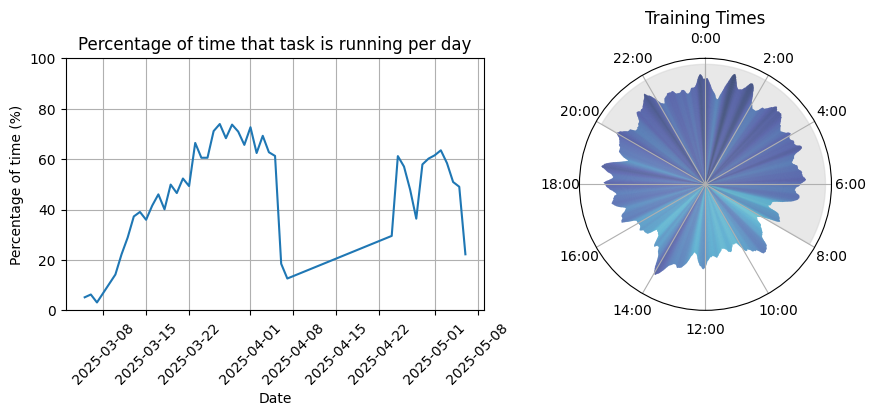

In [68]:
# Plot the percentage of time that the task is running per day and the heatmap of the occupancy during the day
occupancy_df = dft.get_start_and_end_of_sessions_df(df)
daily_percentages = dft.get_daily_occupancy_percentages(occupancy_df)
occupancy_heatmap = dft.get_occupancy_heatmap(occupancy_df, window_size=30)
fig, axs = plt.subplots(1, 2, figsize=(9, 4), gridspec_kw={'width_ratios': [3, 2]})
# plot the percentage of occupancy per day
plots.plot_percentage_of_occupancy_per_day(daily_percentages, ax=axs[0])
# plot the heatmap of occupancy
# transform the second plot to a polar one like this subplot_kw={'projection': 'polar'}
fig.delaxes(axs[1])  # Remove the default second subplot
axs[1] = fig.add_subplot(1, 2, 2, projection='polar')  # Add a polar subplot
plots.plot_training_times_clock_heatmap(occupancy_heatmap, ax=axs[1])
plt.tight_layout()
plt.show()


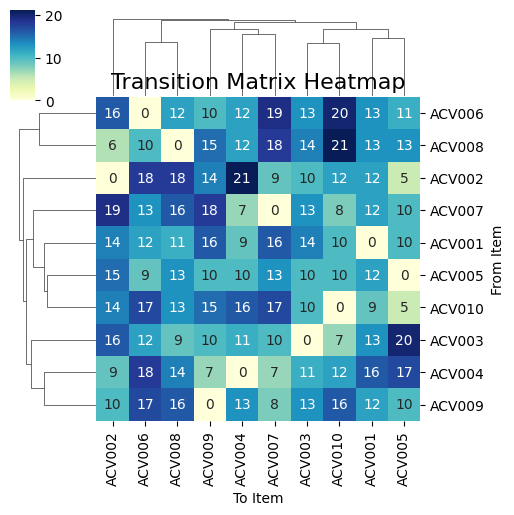

In [95]:
## Analyse the entry orders of the animals
# Sort the dataframe by start_time
sorted_occupancy_df = occupancy_df.sort_values(by='start_time')
# Extract the ordered list of subject names
ordered_subjects = sorted_occupancy_df['subject'].tolist()
# Create the transition matrix
transition_matrix = dft.create_transition_matrix(ordered_subjects)
# Plot the transition matrix
# fig, ax = plt.subplots(figsize=(8, 6))
plots.plot_transition_matrix(transition_matrix)
plt.show()

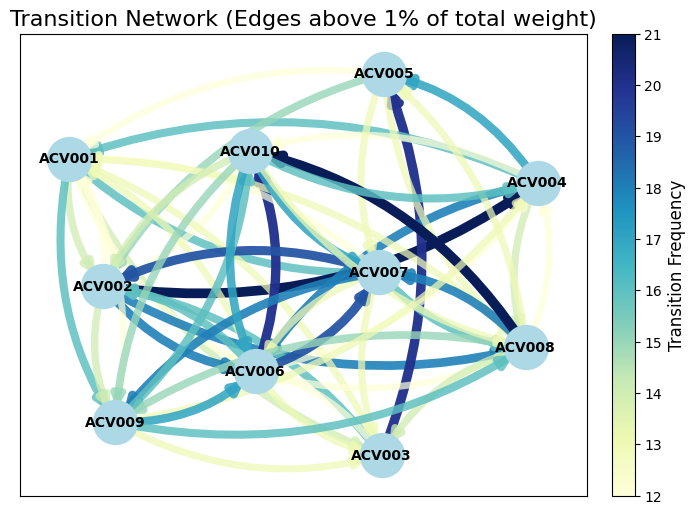

In [ ]:
# Plot a network graph
fig = plots.plot_transition_network_with_curved_edges(transition_matrix, threshold=1, figsize=(8, 6))
plt.show()

Trials per day and evolution of performance

In [71]:
# plot the number of trials per day
df_to_plot = df.groupby(['subject', 'year_month_day', 'current_training_stage']).size().reset_index(name='trials')
# add also the correct percentage
df_to_plot_correct = df.groupby(['subject', 'year_month_day', 'current_training_stage'])[['correct', 'miss_trial']].mean().reset_index()
# merge the two dataframes
df_to_plot = df_to_plot.merge(df_to_plot_correct, on=['subject', 'year_month_day', 'current_training_stage'])
# sort the dataframe by date
df_to_plot = df_to_plot.sort_values(by=['year_month_day'])
# replace the current_training_stage values with more readable ones
df_to_plot['current_training_stage'] = df_to_plot['current_training_stage'].replace({
    'not saved': 'Habituation',
})

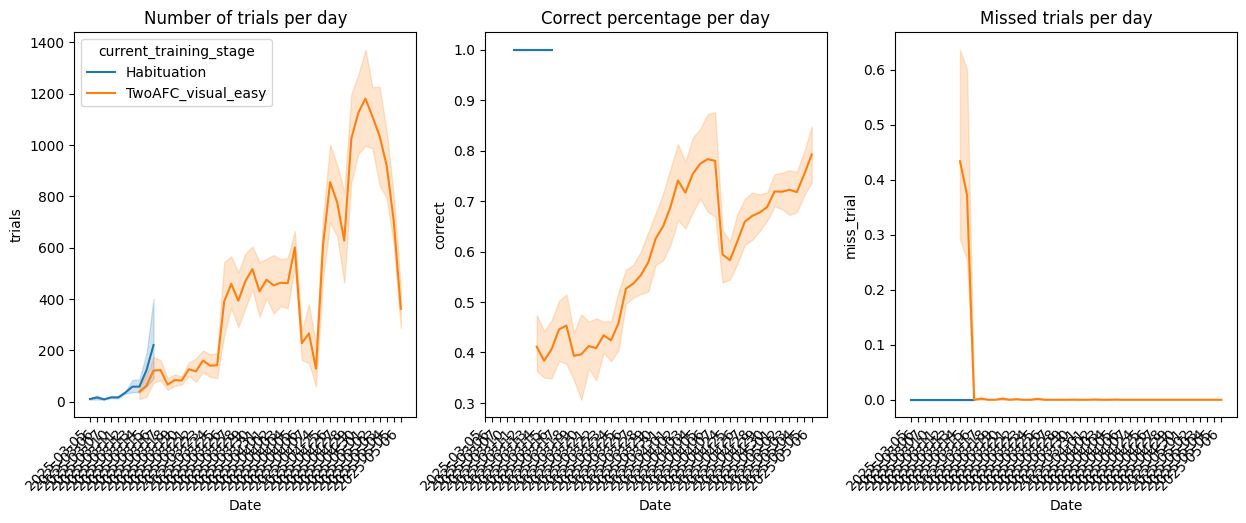

In [72]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs = axs.ravel()
sns.lineplot(data=df_to_plot, x='year_month_day', y='trials', hue='current_training_stage', ax=axs[0])
axs[0].set_title('Number of trials per day')
sns.lineplot(data=df_to_plot, x='year_month_day', y='correct', hue='current_training_stage', ax=axs[1])
axs[1].set_title('Correct percentage per day')
sns.lineplot(data=df_to_plot, x='year_month_day', y='miss_trial', hue='current_training_stage', ax=axs[2])
axs[2].set_title('Missed trials per day')
for ax in axs:
    ax.set_xlabel('Date')
    # tilt the x-axis labels and align them to the right
    ax.tick_params(axis='x', rotation=45)
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), ha='right')
# remove legends of 1 and 2
for ax in axs[1:]:
    ax.legend_.remove()


plt.show()

In [73]:
# plot what the animal is doing, if it is alternating or repeating to the left or to the right
# NOTE: This is not the same as the next analysis, as this is what the animal is doing, not what it should do
df = dft.add_port_where_animal_comes_from(df)
# get a metric to see the bias in choices (including alternation)
df['roa_choice_numeric'] = df.apply(utils.get_repeat_or_alternate_to_numeric, axis=1)

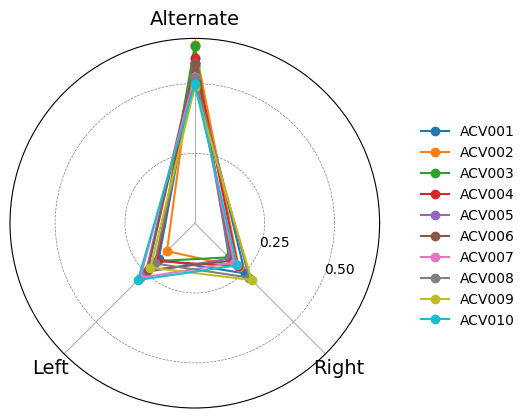

In [74]:
# create a polar plot to see the general bias
df_triangle_polar = dft.get_triangle_polar_plot_df(df)
# plot the polar plot
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax = plots.triangle_polar_plot(df_triangle_polar, ax=ax)
plt.show()

In [114]:
# show the triangles above per animal fluctuating per X number of trials with different hue,
# and illustrating the before and after moving the ports closer
date_of_moving_ports = pd.to_datetime('2025-04-20')
df_before_after = df.copy()
# add a column to indicate if the animal is before or after the moving ports
df_before_after['before_after'] = pd.to_datetime(df_before_after.year_month_day).apply(lambda x: 'before' if x < date_of_moving_ports else 'after')
# recalculate the trial number
df_before_after['total_trial'] = df_before_after.groupby(['subject', 'before_after']).cumcount() + 1
trial_group_size = 200
df_before_after['trial_group'] = df_before_after['total_trial'] // trial_group_size * trial_group_size
groupby = ["trial_group", "before_after"]
df_bias_evolution = dft.get_bias_evolution_df(df_before_after, groupby=groupby)

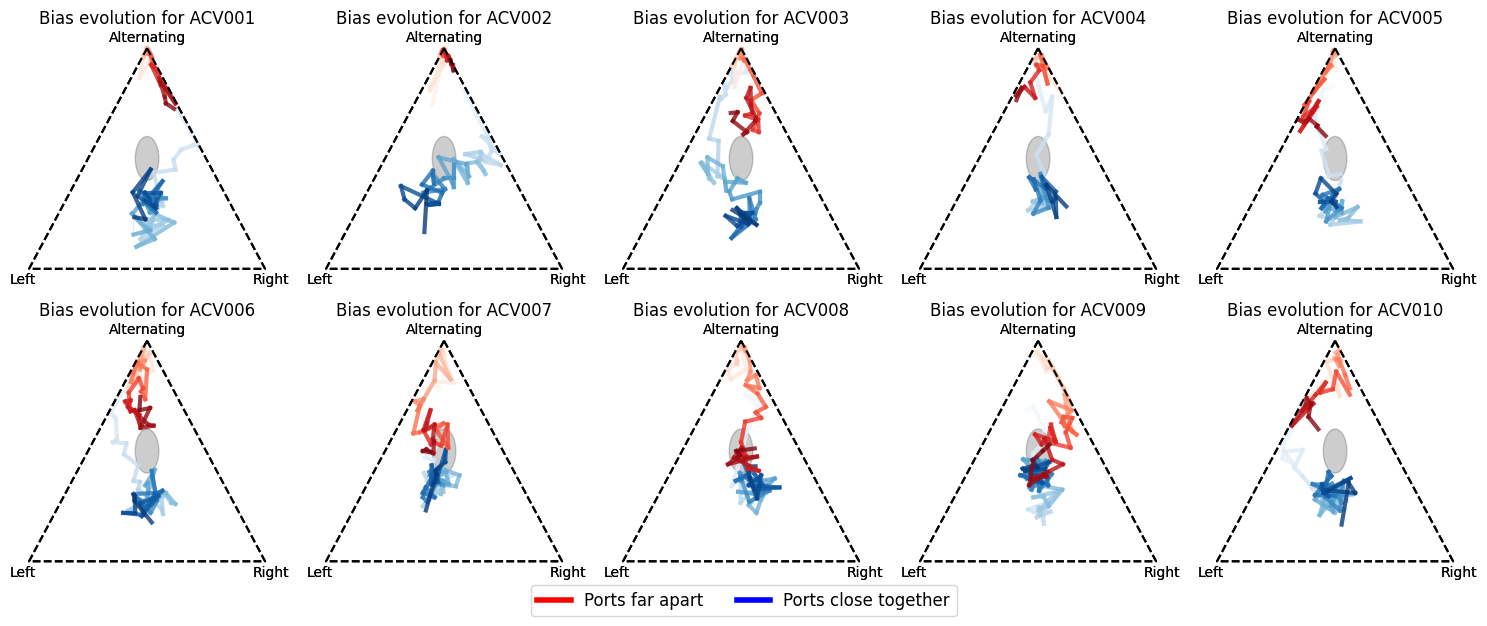

In [128]:
# plot the trajectory of the xs and ys through the sessions
# show this analysis for all the mice
total_subjects = df_bias_evolution['subject'].nunique()
ncols = 5
nrows = int(np.ceil(total_subjects / ncols))
fig, axs = plt.subplots(nrows, ncols, figsize=(15, 3 * nrows), sharey=True)
for subject, ax in zip(df_bias_evolution['subject'].unique(), axs.ravel()):
    df_sub = df_bias_evolution[df_bias_evolution['subject'] == subject]
    for bef_or_after in df_sub['before_after'].unique():
        df_sub_ba = df_sub[df_sub['before_after'] == bef_or_after]
        df_sub_ba = dft.points_to_lines_for_bias_evolution(df_sub_ba, groupby="trial_group")
        # define a palette depending if it is before or after
        if bef_or_after == 'before':
            palette = sns.color_palette("Reds", n_colors=len(df_sub_ba['trial_group'].unique()))
        else:
            palette = sns.color_palette("Blues", n_colors=len(df_sub_ba['trial_group'].unique()))
        ax = plots.plot_decision_evolution_triangle(df_sub_ba, ax=ax, hue="trial_group", palette=palette)
    ax.set_title(f'Bias evolution for {subject}', pad=10, fontsize=12)
# create a legend for the before and after at the bottom of the figure
handles = [plt.Line2D([0], [0], color='red', lw=4, label='Ports far apart'),
           plt.Line2D([0], [0], color='blue', lw=4, label='Ports close together')]
fig.legend(handles=handles, loc='lower center', ncol=2, fontsize=12, bbox_to_anchor=(0.5, -0.05))
plt.tight_layout()
plt.show()

Analysis of the 2AFC task

In [19]:
# Correct percentage per total trial in 2AFC. Separate also alternating and repeating
df2afc = df[df['current_training_stage'] == 'TwoAFC_visual_easy']
# First, get a column that indicates what the animal should do
df_subject_list = []
for mouse in animals:
    df_mouse = df2afc[df2afc['subject'] == mouse]
    df_session_list = []
    for session in df_mouse['session'].unique():
        df_session = df_mouse[df_mouse['session'] == session].copy()
        df_session["repeat_or_alternate"] = dft.get_repeat_or_alternate_series(df_session.correct_side)
        df_session_list.append(df_session)
    # calculate the performances
    df_mouse = pd.concat(df_session_list, ignore_index=True)
    df_mouse = dft.get_repeat_or_alternate_performance(df_mouse, window=25)
    df_mouse = dft.get_performance_through_trials(df_mouse, window=25)
    df_subject_list.append(df_mouse)

df2afc = pd.concat(df_subject_list, ignore_index=True)

In [20]:
# Plot the performance through trials
# Bin the total trials every 100 trials
df2afc['total_trial_bin'] = df2afc['total_trial'] // 100 * 100
# Group by the binned total trials and calculate the mean performance
df_perf_binned = df2afc.groupby(['subject', 'total_trial_bin', 'repeat_or_alternate']).agg({'correct': 'mean'}).reset_index()

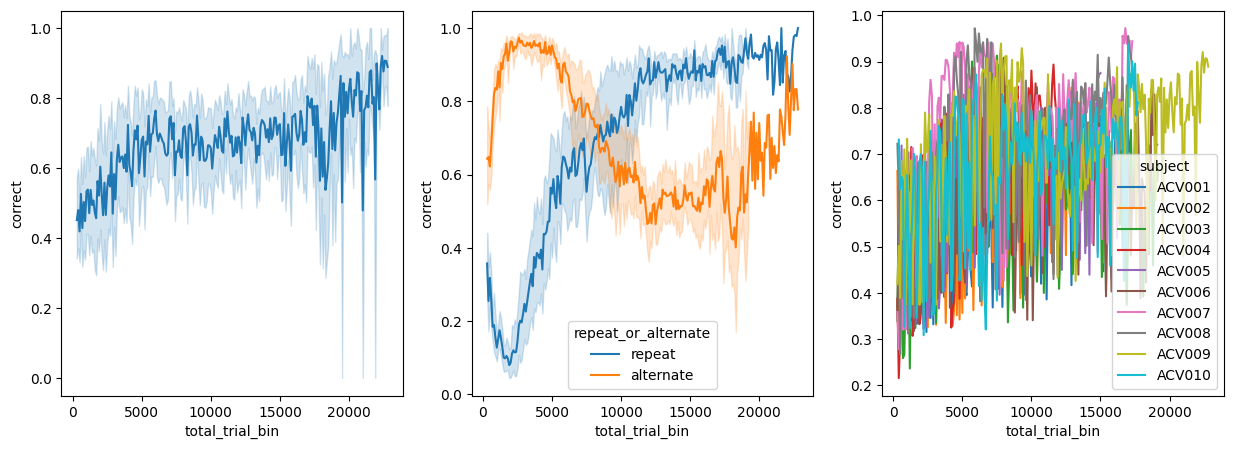

In [21]:
# plot the performance through trials
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
# plot the performance through trials
sns.lineplot(data=df_perf_binned, x='total_trial_bin', y='correct', ax=axs[0])
sns.lineplot(data=df_perf_binned, x='total_trial_bin', y='correct', hue='repeat_or_alternate', hue_order=['repeat', 'alternate'], ax=axs[1])
sns.lineplot(data=df_perf_binned, x='total_trial_bin', y='correct', hue='subject', ax=axs[2], errorbar=None)
plt.show()

In [22]:
#TODO: calculate reaction times per animal in 2AFC and show overlapping distributions
#TODO: show evolution of the reaction times per day, and the iti
#TODO: do this analysis for the postdoc data and compare

Look into behavior more closely

In [23]:
# select only one mouse for now
df2afc_sel = df2afc[df2afc['subject'] == 'ACV006']

In [24]:
# select those sessions with performance above 0.65
sessions_to_keep = df2afc_sel.groupby('session')['correct'].mean().reset_index()
sessions_to_keep = sessions_to_keep[sessions_to_keep['correct'] > 0.55]['session'].unique()
# filter the dataframe to keep only those sessions
df2afc_sel = df2afc_sel[df2afc_sel['session'].isin(sessions_to_keep)]

sessions_to_keep

array([ 28.,  30.,  35.,  38.,  43.,  45.,  47.,  52.,  57.,  58.,  59.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97., 100.,
       101., 102., 103., 104., 105., 106., 107., 108., 109., 110., 111.,
       112., 113., 114., 115., 116., 117., 118., 119., 120., 121., 122.,
       123., 124., 125., 126.])

In [25]:
import ast
def add_visual_stimulus_difference(df):
    df['visual_stimulus'] = df['visual_stimulus'].apply(ast.literal_eval)
    df["visual_stim_difference"] = df["visual_stimulus"].apply(lambda x: x[0] - x[1])
    # bin the data every 0.1
    df["vis_stim_dif_bin"] = np.round((df["visual_stim_difference"] // 0.1) * 0.1, 1)
    return df

In [26]:
df2afc_sel = add_visual_stimulus_difference(df2afc_sel)

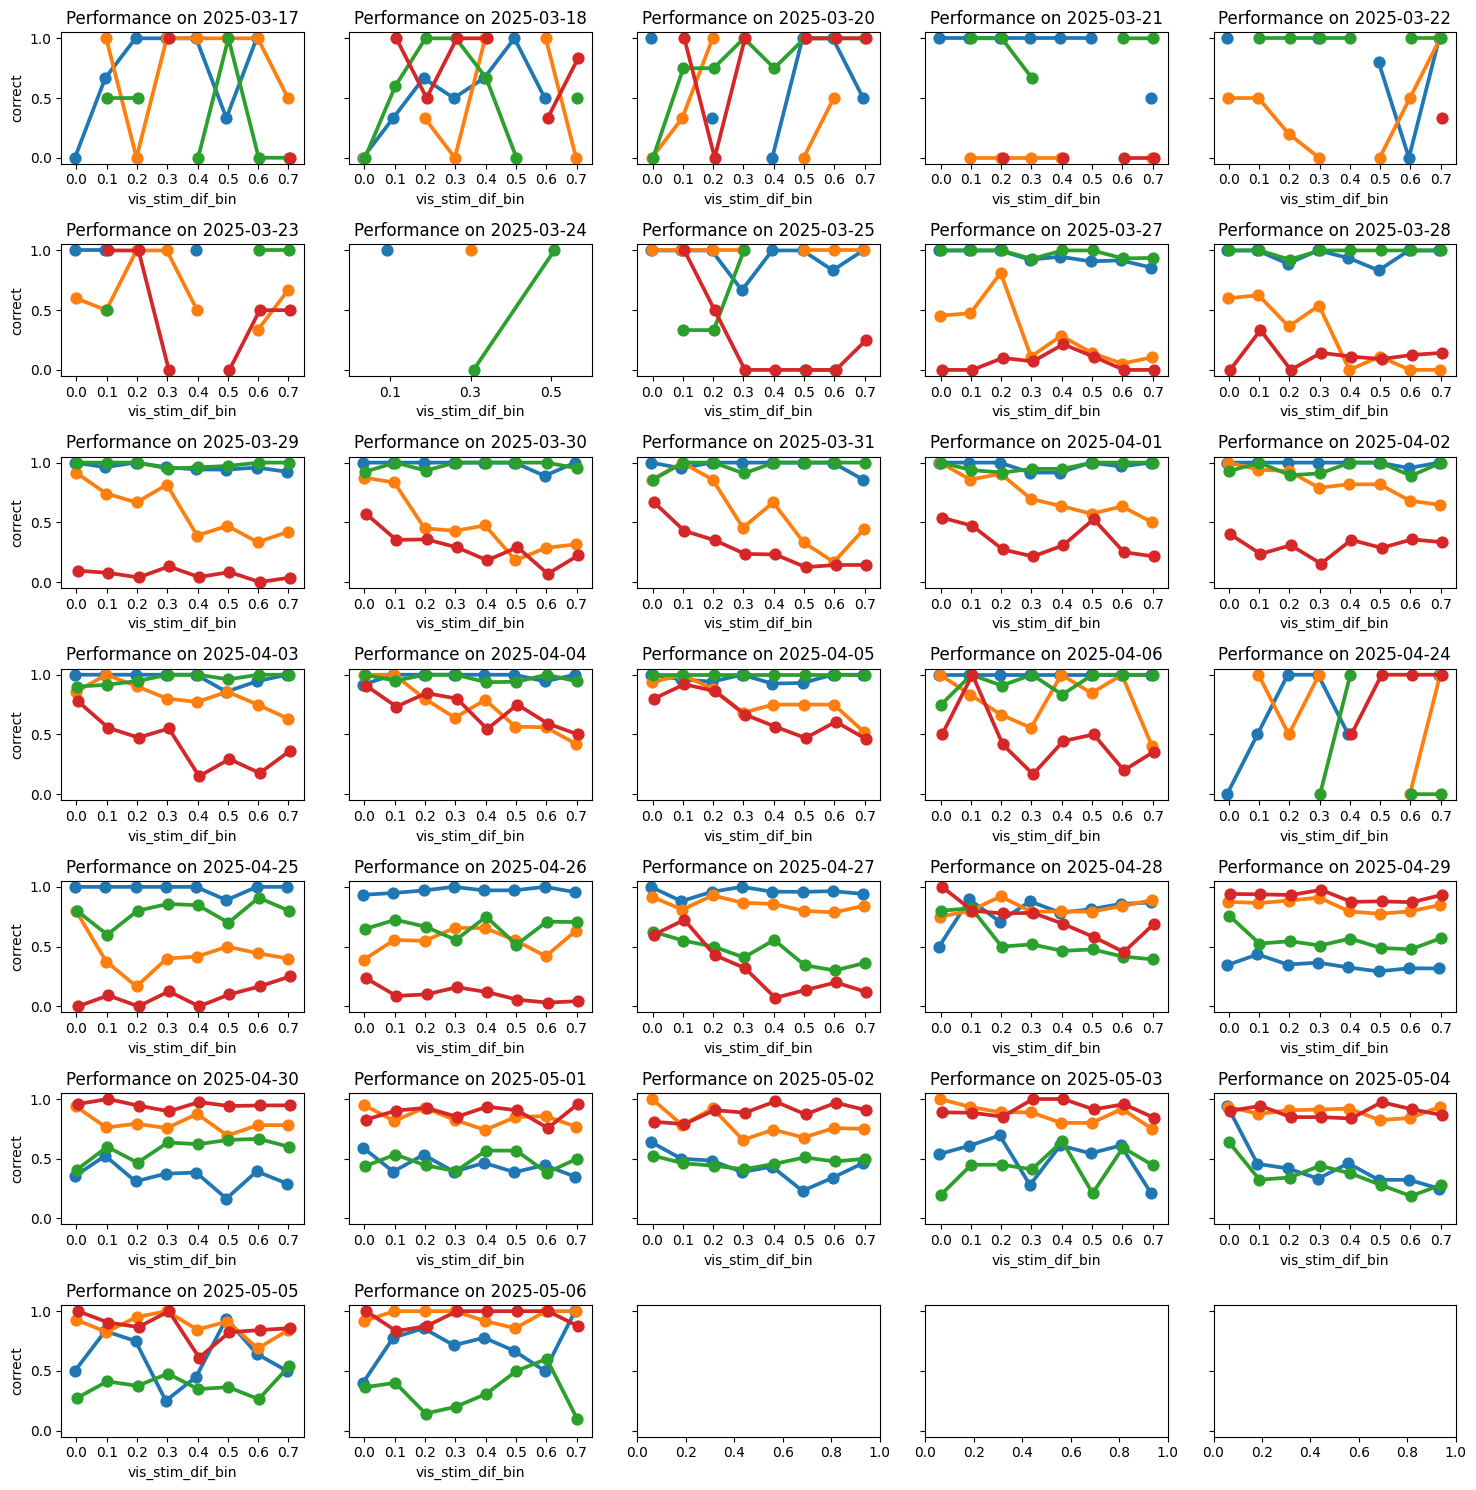

In [27]:
# TODO: compare this with the condition of where the animal comes from

# check the evolution of each of these "decisions" during training
# group by the binned data and calculate the mean performance
df2afc_binned = df2afc_sel.groupby(['vis_stim_dif_bin', 'correct_side', 'repeat_or_alternate', 'year_month_day'])[['correct']].mean().reset_index()
# get the different combinations of correct side and repeat or alternate
df2afc_binned['correct_side_repeat_or_alternate'] = df2afc_binned['correct_side'] + '_' + df2afc_binned['repeat_or_alternate']
# get only the 4 combinations and remove nans etc
df2afc_binned = df2afc_binned[df2afc_binned['correct_side_repeat_or_alternate'].isin(['left_repeat', 'left_alternate', 'right_repeat', 'right_alternate'])]


# plot the binned data with the new combination for each day
fig, axs = plt.subplots(ncols=5, nrows=pd.unique(df2afc_binned['year_month_day']).size // 5 + 1, figsize=(15, 15), sharey=True)
axs = axs.ravel()
# plot the binned data for each day
for (day, group), ax in zip(df2afc_binned.groupby('year_month_day'), axs):
    try:
        sns.pointplot(data=group, x='vis_stim_dif_bin', y='correct', hue='correct_side_repeat_or_alternate', dodge=True, errorbar=None, ax=ax, legend=False)
    except ZeroDivisionError:
        # If there's a ValueError, it might be due to not enough data points for the hue
        # In this case, we can skip plotting for this group
        print(f"Skipping {day} due to insufficient data for plotting.")
        continue
    ax.set_title(f'Performance on {day}')
plt.tight_layout()
plt.show()

this shows that when they are learning and they struggle with a decision kind, they use the overall intensity of the port to take that decision. But it is not a general side bias, as it does not affect the alternation behavior

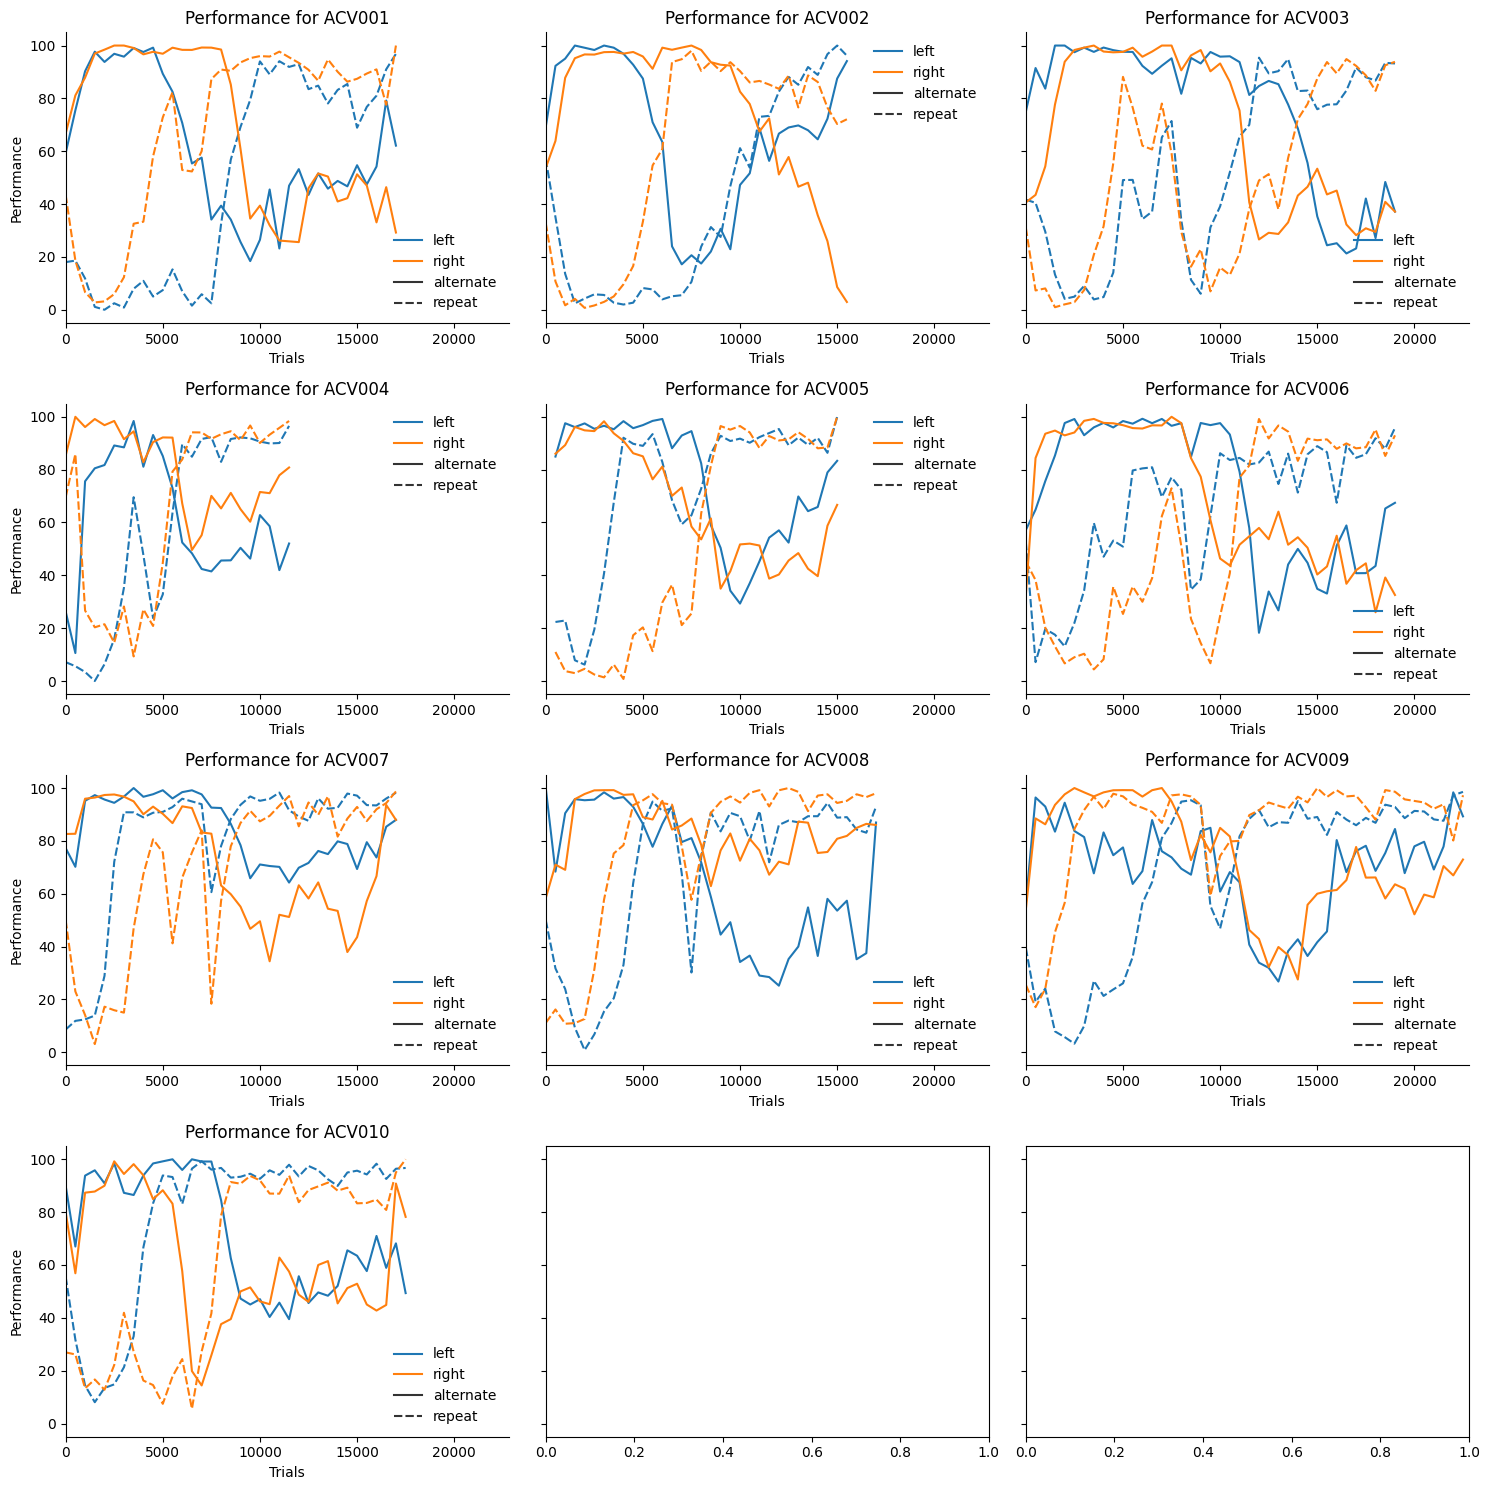

In [28]:
# show this analysis for all the mice
total_subjects = df2afc['subject'].nunique()
ncols = 4
nrows = int(np.ceil(total_subjects / ncols))
# find the max trials that a subject has done
max_trials = df2afc['total_trial'].max()
fig, axs = plt.subplots(ncols, nrows, figsize=(15, 5 * nrows), sharey=True)
for subject, ax in zip(df2afc['subject'].unique(), axs.ravel()):
    # filter the dataframe to keep only the current subject
    df_subject = df2afc[df2afc['subject'] == subject]
        # group by the binned data and calculate the mean performance
    df_pbd = dft.get_performance_by_decision_df(df_subject)
    # plot the data
    plots.performance_by_decision_plot(df_pbd, ax=ax)
    ax.set_title(f'Performance for {subject}')
    ax.set_xlim(0, max_trials)

plt.tight_layout()
plt.show()

each mouse has a prefered side, but they all have to counteract the "alternation" strategy, although they do this without affecting the performance on the alternation

In [ ]:

import altair as alt
import pandas as pd

# Sample data (replace with your actual dataset)
data = df_to_plot.copy()
# convert nans to 1
data['correct'] = data['correct'].fillna(1) * 100

In [ ]:
import altair as alt
import pandas as pd
import numpy as np

# Convert date to datetime format
data['year_month_day'] = pd.to_datetime(data['year_month_day'])

# Get min and max dates
min_date = data['year_month_day'].min()
max_date = data['year_month_day'].max()

# Create a list of all dates in the range
date_range = pd.date_range(start=min_date, end=max_date)
date_strings = [d.strftime('%Y-%m-%d') for d in date_range]

# Add a numeric field for the slider
data['date_index'] = data['year_month_day'].apply(
    lambda x: np.where(date_range == x)[0][0]
)

# Find global min and max values for x and y axes
min_trials = data['trials'].min()
max_trials = data['trials'].max()
min_correct = data['correct'].min()
max_correct = data['correct'].max()

# Add some padding to the axis limits (10%)
trials_padding = (max_trials - min_trials) * 0.1
correct_padding = (max_correct - min_correct) * 0.1

# Create a slider for date selection
date_slider = alt.binding_range(
    min=0,
    max=len(date_range)-1,
    step=1,
    name='Date: '
)

# Create a parameter that updates with the slider
date_selection = alt.param(
    name='date_idx',
    value=0,
    bind=date_slider
)

# Create a derived field for display purposes
slider_date = alt.expr.time(date_range[0].timestamp()*1000) + alt.expr.milliseconds(86400000 * date_selection)

# Hover selection for subjects
hover_selection = alt.selection_point(
    name='hover',
    on='mouseover', 
    fields=['subject'],
    empty=False
)

# Base chart encoding
base_encoding = dict(
    x=alt.X('trials:Q', 
            title='Number of Trials',
            scale=alt.Scale(domain=[min_trials - trials_padding, max_trials + trials_padding])),
    y=alt.Y('correct:Q', 
            title='Correct Choices (%)', 
            scale=alt.Scale(domain=[0, 100])),
    color=alt.Color('current_training_stage:N', 
                    title='Training Stage',
                    legend=alt.Legend(orient='bottom', 
                                      titleFontSize=12, 
                                      labelFontSize=10))
)

# Main points filtered by current date
points = alt.Chart(data).mark_circle().encode(
    **base_encoding,
    size=alt.Size('trials:Q', title='Trials', scale=alt.Scale(range=[10, 200])),
    opacity=alt.condition(hover_selection, alt.value(1), alt.value(0.5)),
    tooltip=['subject', 'trials', 'correct', 'current_training_stage', 
             alt.Tooltip('year_month_day:T', title='Date')]
).transform_filter(
    alt.datum.date_index == date_selection
).add_params(hover_selection)

# Trajectories that appear on hover
trajectories = alt.Chart(data).mark_line(
    opacity=0.7,
    strokeWidth=2
).encode(
    **base_encoding,
    detail='subject:N',
    opacity=alt.condition(hover_selection, alt.value(0.8), alt.value(0))
).transform_filter(
    hover_selection
)

# All points for the selected subject (trajectory points)
trajectory_points = alt.Chart(data).mark_circle(
    size=80
).encode(
    **base_encoding,
    opacity=alt.condition(hover_selection, alt.value(0.8), alt.value(0)),
    tooltip=['subject', 'trials', 'correct', 'current_training_stage', 
             alt.Tooltip('year_month_day:T', title='Date')]
).transform_filter(
    hover_selection
)

# Date labels for trajectory points
date_labels = alt.Chart(data).mark_text(
    align='left',
    baseline='middle',
    dx=10,
    fontSize=10
).encode(
    **base_encoding,
    text='year_month_day:T',
    opacity=alt.condition(hover_selection, alt.value(1), alt.value(0))
).transform_filter(
    hover_selection
)

# Subject labels that appear on hover
subject_labels = alt.Chart(data).mark_text(
    align='center',
    baseline='bottom',
    dy=-10,
    fontSize=14,
    fontWeight='bold'
).encode(
    **base_encoding,
    text='subject:N',
    opacity=alt.condition(hover_selection, alt.value(1), alt.value(0))
).transform_filter(
    alt.datum.date_index == date_selection
).transform_filter(
    hover_selection
)

# Current date display
date_display = alt.Chart({'values': [{}]}).mark_text(
    align='right',
    baseline='top',
    fontSize=14,
    font='Arial',
    fontWeight='bold',
    dx=-10,
    dy=10
).encode(
    text=alt.Text(
        'yearmonthdate(datum.date):T',
        title='Current Date'
    ),
    x=alt.value(600),  # Right side of the chart
    y=alt.value(0)     # Top of the chart
).transform_calculate(
    date=slider_date
)

# Combine all layers
chart = alt.layer(
    points, 
    trajectories, 
    trajectory_points, 
    date_labels, 
    subject_labels, 
    date_display
).properties(
    width=600, 
    height=400,
    title='Subject Performance by Date'
).add_params(date_selection)

chart

In [ ]:
data['year_month_day']

In [ ]:
plt.hist(df.TRIAL_END - df.TRIAL_START, bins=500)
plt.show()

In [ ]:
df.columns